# Exploratory data analysis and visualization of Coursera Course data set

**The goal** of EDA is to find potential ways to increase the quality of Coursera course assortment.

To achieve the main goal it was further broken down into the following 4 sub-goals:

1. Conduct comprehensive exploratory data analysis (EDA) of the dataset utilizing graphical techniques.
2. Investigate the correlation between course ratings and other variables, with the assumption that course ratings serve as indicators of course quality.
3. Assess the demand for various courses by analyzing the enrollment counts.
4. Identify potential niches for new courses or opportunities for enhancing existing courses

### Summary of Key Findings:

- **Beginner-Oriented Courses**: Coursera primarily offers beginner-level courses.
- **High Course Ratings**: Most courses have high ratings, indicating overall quality.
- **No Strong Correlation**: There's no significant relationship between course ratings and student enrollment, course difficulty, and certificate type.
- **Lack of Professional Certificates and Advanced Courses**: There is a significant lack of professional certificates and courses for advanced users.
- **Popular Course**: Stanford's Machine Learning course is one of the most popular.
- **Demand for Professional Certificates and Mixed Courses**: There is a huge demand for professional certificates and intermediate courses.
- **Higher Demand for Advanced Courses**: There is also a notable demand for advanced courses.
- **Low Ratings and Enrollment for Specific Course**: Google's Machine Learning for Trading course has comparatively low ratings and enrollment count.
- **High Average Ratings for Course Providers**: Course providers on average have high ratings, indicating they are providing good quality content.


### Summary of Suggestions for Coursera:

- **Expand Advanced Course Offerings**: Increase the variety of advanced courses to cater to learners with higher skill levels.
- **Provide More Professional Certificates**: Offer more professional certificates to meet the specific needs of learners seeking formal credentials.
- **Increase Mixed Course Offerings**: Develop more Mixed courses to bridge the gap between beginner and advanced levels.
- **Conduct Deeper Analysis of Popular Courses**: Perform a deeper analysis of Stanford's Machine Learning course to understand the reasons for its popularity. Insights from this analysis could help other courses implement similar strategies.
- **Quality Improvement for Specific Courses**: Improve the quality of Google's Machine Learning for Trading course, which currently has comparatively low ratings and enrollment count.
- **Maintain High Standards**: Ensure that all course types, including professional certificates, maintain high quality and receive positive ratings from learners.



### Importing libraries

In [56]:
%pwd

'c:\\Users\\Mokslams2\\Documents\\turing_college'

In [58]:
pip install "black[jupyter]"

  Using cached black-24.8.0-cp312-cp312-win_amd64.whl.metadata (78 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached mypy_extensions-1.0.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached pathspec-0.12.1-py3-none-any.whl.metadata (21 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached mypy_extensions-1.0.0-py3-none-any.whl (4.7 kB)
Using cached pathspec-0.12.1-py3-none-any.whl (31 kB)
Using cached black-24.8.0-cp312-cp312-win_amd64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [59]:
!black "c:\\Users\\Mokslams2\\Documents\\turing_college\coursera_analysis.ipynb"

reformatted c:\Users\Mokslams2\Documents\turing_college\coursera_analysis.ipynb

All done! ✨ 🍰 ✨
1 file reformatted.


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.ticker as ticker
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

### Loading data from Kaggle

In [30]:
# An alternative way to download datasets from kaggle
# Create API token ~\.kaggle\kaggle.json

import kaggle

kaggle.api.authenticate()
kaggle.api.dataset_download_files(
    "siddharthm1698/coursera-course-dataset", path=".", unzip=True
)

Dataset URL: https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset


In [31]:
df = pd.read_csv("coursea_data.csv", index_col=0).sort_index()
df

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k
...,...,...,...,...,...,...
886,Understanding Modern Finance,American Institute of Business and Economics,SPECIALIZATION,4.4,Intermediate,11k
887,Object-Oriented Design,University of Alberta,COURSE,4.7,Intermediate,33k
888,Aprende a programar con Python,Universidad Austral,SPECIALIZATION,4.2,Beginner,6.6k
889,Погружение в Python,Moscow Institute of Physics and Technology,COURSE,4.7,Intermediate,45k


### Data cleaning

In [32]:
df["course_students_enrolled"] = (
    df["course_students_enrolled"]
    .str.replace("k", "*1_000")
    .str.replace("m", "*1_000_000")
    .map(eval)
)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    float64
dtypes: float64(2), object(4)
memory usage: 48.7+ KB


**No NaNs** were found, so no actions were required.
Moreover, we can see that there **3 Categorical variables**. Categorical variables typically represent data that can be divided into specific categories or groups. In this DataFrame, ['course_organization', 'course_Certificate_type', 'course_difficulty'] is a clear example of a categorical variable because it represents distinct categories of music.

On the other hand, course title are technically of type ‘object’, but they don’t represent categories in the same way. They are unique names and are not meant to be grouped into categories.

Finally, there are **6 features** in the data set because there are 6 columns in the data set. 

In [34]:
df.describe().map(lambda x: "{:,.2f}".format(x).rstrip("0").rstrip("."))

,course_rating,course_students_enrolled
count,891,891
mean,4.68,"90,552.08"
std,0.16,"181,936.45"
min,3.3,"1,500"
25%,4.6,"17,500"
50%,4.7,"42,000"
75%,4.8,"99,500"
max,5,"3,200,000"


## Removing duplicated samples

In [35]:
duplicate_rows = df[df[["course_title"]].duplicated(keep=False)]
duplicate_rows

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000.0
181,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290000.0
205,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54000.0
241,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81000.0
325,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39000.0
756,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41000.0



No duplicated rows were found, so no actions were required.

In [36]:
del duplicate_rows

## Treating outliers

In [37]:
numerical_features = df.select_dtypes(include=[np.number]).columns

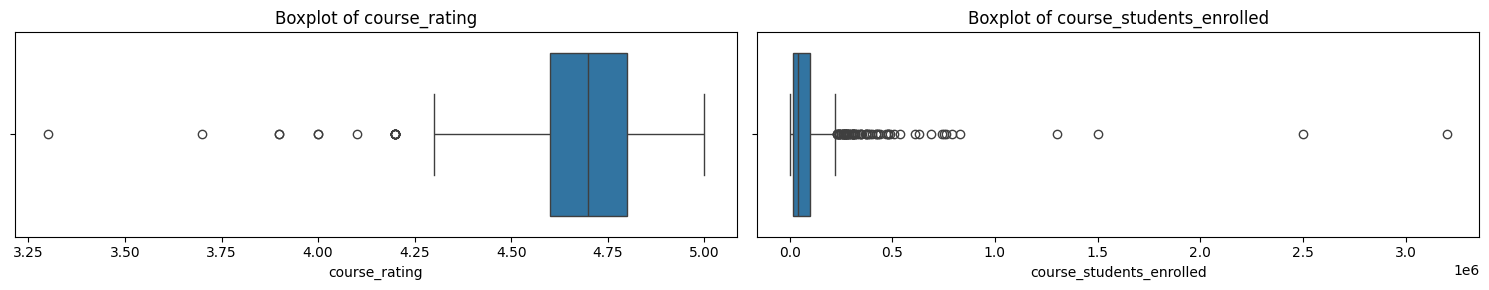

In [38]:
numerical_features = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 3))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

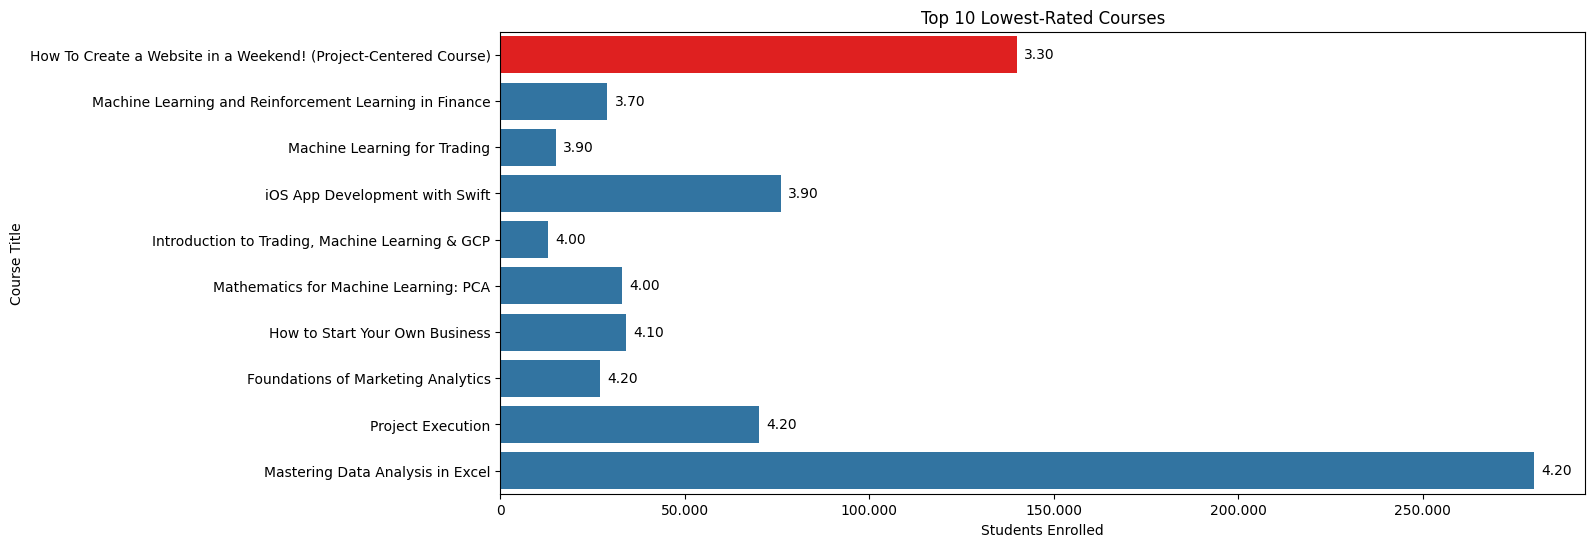

In [39]:
df.sort_values(by="course_rating", ascending=True, inplace=True)

plt.figure(figsize=(14, 6))


colors = ["red"] + ["#1f77b4"] * 9

sns.barplot(
    x="course_students_enrolled", y="course_title", data=df.head(10), palette=colors
)


for i in range(10):
    plt.annotate(
        f"{df["course_rating"].iloc[i]:.2f}",
        xy=(df["course_students_enrolled"].iloc[i] + 2000, i),
        ha="left",
        va="center",
    )

plt.title("Top 10 Lowest-Rated Courses")
plt.xlabel("Students Enrolled")
plt.ylabel("Course Title")

plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ",").replace(",", "."))
);

Outliers were identified using a boxplot, which displays data distribution and highlights potential anomalies. Despite finding outliers in several columns, they were not removed to avoid introducing NaNs or deleting rows, which could disrupt upcoming Exploratory Data Analysis (EDA). Thus, outliers were retained to maintain data integrity and ensure a comprehensive analysis. More we can see that lowest rated course is has almost 140.000 enrolled students.

## How many observations are there in this dataset?

In [40]:
num_observations = df.shape[0]
print(f"There are {num_observations} unique coursera courses in this data set.")
print(
    f"There are totally {int(df["course_students_enrolled"].sum()):,} enrolled in all the courses (not unique)"
)

There are 891 unique coursera courses in this data set.
There are totally 80,681,900 enrolled in all the courses (not unique)


## Evaluating the impact of the Course Organization type to the Course Rating.

In [41]:
df["course_organization"].nunique()

154

**Horizontal bar plots** of Average Course Rating by Organization

In [42]:
grouped_data = (
    df.groupby("course_organization")["course_rating"]
    .mean()
    .sort_values(ascending=False)
)

fig = px.bar(
    x=grouped_data.head(10),
    y=grouped_data.head(10).index,
    title="Average Course Rating by Organization Top-10",
)
fig.update_layout(
    xaxis_title="Average Course Rating", yaxis_title="Course Organization"
)

In [67]:
fig = px.bar(
    x=grouped_data.tail(10),
    y=grouped_data.tail(10).index,
    title="Average Course Rating by Organization Bottom-10",
)
fig.update_layout(
    xaxis_title="Average Course Rating", yaxis_title="Course Organization"
)
fig.update_xaxes(range=[0, 5])

The horizontal bar plots of course ratings by organization reveal that course ratings are consistently high across all organizations. Even the bottom 10 organizations maintain impressive ratings, with the lowest average rating being 4.275.

**Vertical bar chart** of Most Popular Courses (Top-15)

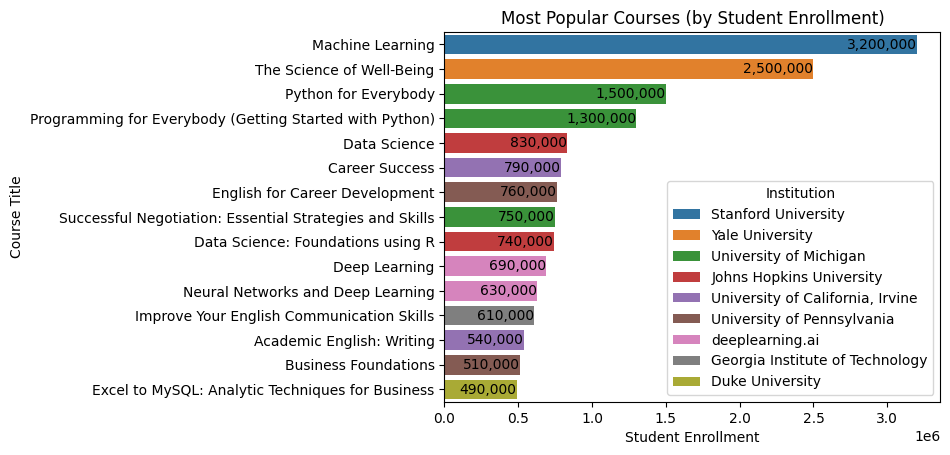

In [44]:
sns.barplot(
    x="course_students_enrolled",
    y="course_title",
    hue="course_organization",
    data=df.nlargest(15, "course_students_enrolled"),
)

for i in range(len(df.nlargest(15, "course_students_enrolled"))):
    value = df.nlargest(15, "course_students_enrolled")[
        "course_students_enrolled"
    ].iloc[i]
    formatted_value = f"{int(value):,}"
    plt.annotate(formatted_value, xy=(value, i), ha="right", va="center")

plt.title("Most Popular Courses (by Student Enrollment)")
plt.xlabel("Student Enrollment")
plt.ylabel("Course Title")
plt.legend(title="Institution");

This horizontal bar chart that displays the most popular courses by student enrollment, along with their corresponding institutions. The most popular course in absolute terms is the Machine Learning course offered by Stanford University.

Additionally, the University of Michigan provides two highly popular courses: “Python for Everybody” and “Programming for Everybody (Getting Started with Python).” Another notable course from the University of Michigan is “Successful Negotiation: Essential Strategies and Skills.” Overall, the University of Michigan appears to be a leader in creating popular courses that attract Coursera users.

Other prominent institutions include Johns Hopkins University and DeepLearning.AI, which also offer widely enrolled courses.

## Evaluating the relationship between course rating and the count of students enrolled.

To get a better understanding of the distribution of the data we use **histograms** to visualize the distribution of the course_rating and course_students_enrolled columns:

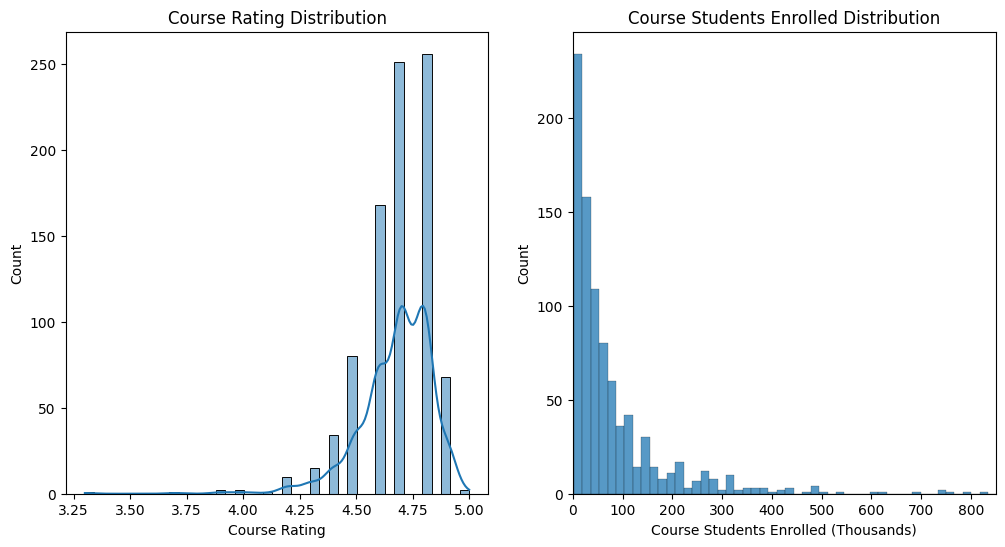

In [66]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="course_rating", kde=True)
plt.title("Course Rating Distribution")
plt.xlabel("Course Rating")
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="course_students_enrolled")
plt.title("Course Students Enrolled Distribution")
plt.xlabel("Course Students Enrolled (Thousands)")
plt.xlim(left=0, right=850_000)
plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, p: int(int(x) / 1000))
);

From the graphs, we observe that the average course rating is quite high, with most values ranging between 4 and 5. This indicates that the majority of courses are rated either four or five stars. Regarding student enrollment, the distribution is highly skewed to the right due to the presence of outliers. A few courses have a significantly high number of enrolled students, with one course even reaching 3.2 million enrollments were omitted to enhance visibility. However, the majority of courses have up to half a million students enrolled.

**Scatter Plot:** To visualize the relationship between Course Rating and Course Students Enrolled

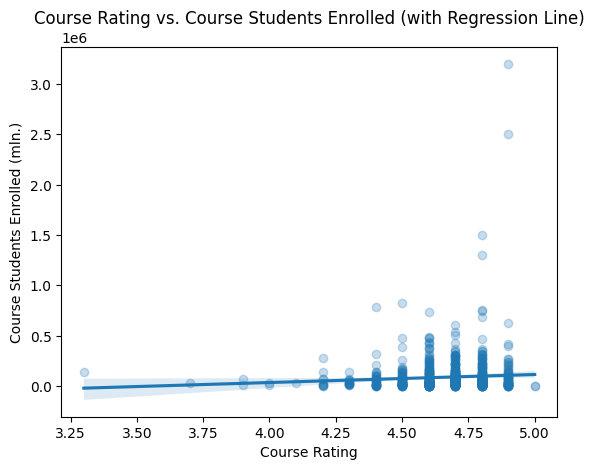

In [46]:
sns.regplot(
    x="course_rating",
    y="course_students_enrolled",
    data=df,
    scatter_kws={"alpha": 0.25},
)
plt.xlabel("Course Rating")
plt.ylabel("Course Students Enrolled (mln.)")
plt.title("Course Rating vs. Course Students Enrolled (with Regression Line)");

The scatter plot depicting course ratings against the number of students enrolled reveals a weak relationship between these variables. The regression line is nearly horizontal, indicating minimal correlation. Despite some outliers, the majority of data points fall between zero and half a million students enrolled, with course ratings predominantly between four and five stars.

To understand the relationships between the variables, let's calculate **correlation**

In [47]:
correlation, p_value = stats.pearsonr(
    df["course_rating"], df["course_students_enrolled"]
)
print(f"Correlation is {correlation} ")
print(f"P value is {p_value}")

Correlation is 0.07109035671526535 
P value is 0.03386072533795261


## Evaluating the impact of the course difficulty to the course rating.

**Boxplot** for Course Rating by Difficulty and **Barplot** Difficulty by the Median of Students Enrolled

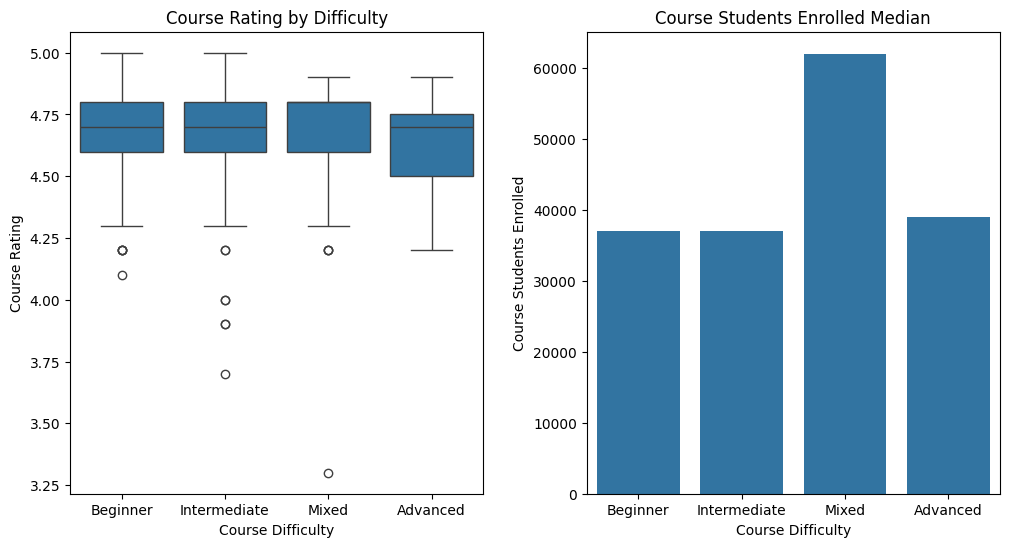

In [48]:
difficulty_median = (
    df.groupby("course_difficulty")["course_students_enrolled"].median().reset_index()
)

order = ["Beginner", "Intermediate", "Mixed", "Advanced"]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="course_difficulty", y="course_rating", order=order)
plt.title("Course Rating by Difficulty")
plt.xlabel("Course Difficulty")
plt.ylabel("Course Rating")

plt.subplot(1, 2, 2)
sns.barplot(
    difficulty_median, x="course_difficulty", y="course_students_enrolled", order=order
)
plt.title("Course Students Enrolled Median")
plt.ylabel("Course Students Enrolled")
plt.xlabel("Course Difficulty")
plt.subplots_adjust(wspace=0.25)
plt.show()

In this analysis, we utilized a box plot to visualize course ratings by difficulty level. The chart reveals that course ratings are generally consistent across all difficulty levels, with minor exceptions due to outliers in the beginner, mixed, and intermediate categories. The bar chart reveals a higher demand for mixed courses and slightly higher demand for advanced courses.

**Bar Plot:** To visualize the Distribution of Course Difficulty by Course Count

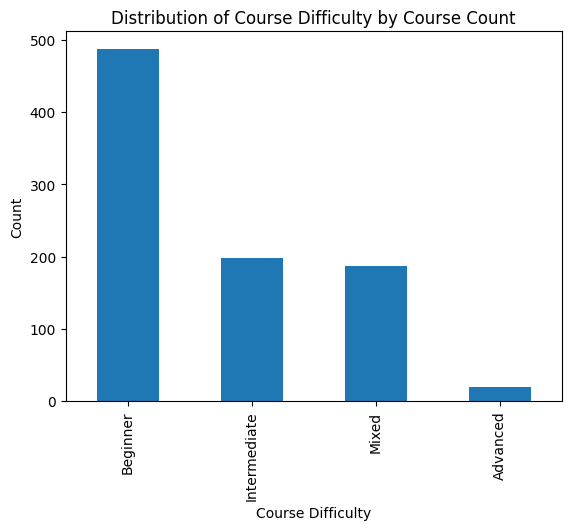

In [69]:
df["course_difficulty"].value_counts().plot(kind="bar")
plt.title("Distribution of Course Difficulty by Course Count")
plt.xlabel("Course Difficulty")
plt.ylabel("Count");

This bar chart of the course difficulty by course count reveals that a huge lack of advanced courses and it shows that a field of courses for beginners like white saturated professional Style

**Heatmap** for Course Difficulty by Organization

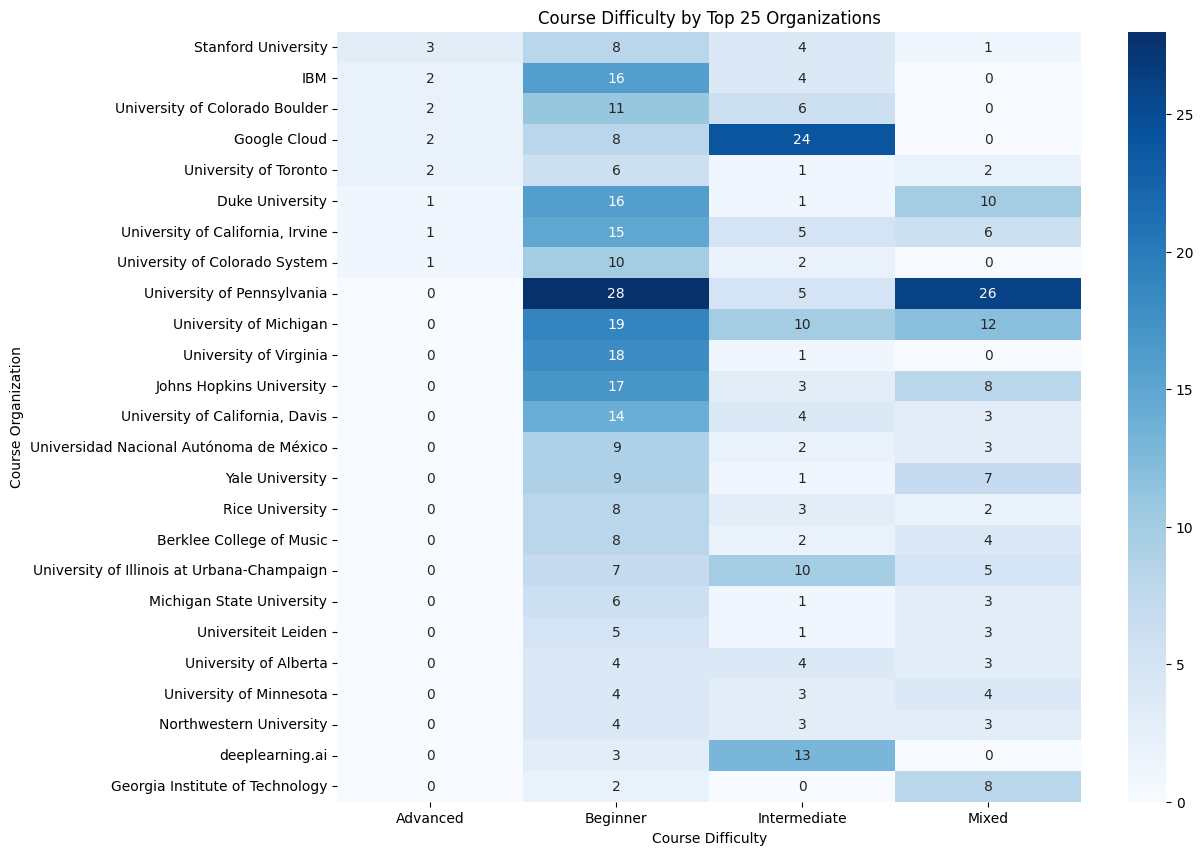

In [50]:
df_top_25 = df[
    df["course_organization"].isin(
        df["course_organization"].value_counts().nlargest(25).index
    )
]

pivot_table = pd.pivot_table(
    df_top_25,
    index="course_organization",
    columns="course_difficulty",
    aggfunc="size",
    fill_value=0,
)
pivot_table = pivot_table.sort_values(by=pivot_table.columns.tolist(), ascending=False)

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, cmap="Blues", annot=True)
plt.title("Course Difficulty by Top 25 Organizations")
plt.xlabel("Course Difficulty")
plt.ylabel("Course Organization");

An analysis of the heatmap reveals significant trends in course distribution across different organizations and difficulty levels. The University of Pennsylvania, for instance, offers a substantial number of beginner-level and mixed-level courses. Moreover, the heatmap indicates a general bias towards beginner-level courses, with fewer advanced options available. 

**Treemap** for Course Difficulty by Organization

In [51]:
df_top_5 = df[
    df["course_organization"].isin(
        df["course_organization"].value_counts().nlargest(5).index
    )
]

grouped = (
    df_top_5.groupby(["course_organization", "course_difficulty", "course_title"])
    .agg(
        count=("course_title", "count"),
        avg_rating=("course_rating", "mean"),
        students=("course_students_enrolled", "first"),
    )
    .reset_index()
    .sort_values("count", ascending=False)
)


fig = px.treemap(
    grouped,
    path=["course_organization", "course_difficulty", "course_title"],
    values="students",
    color="avg_rating",
    color_continuous_scale="spectral",
    hover_data=["count", "avg_rating", "students"],
    custom_data=["count", "avg_rating", "students"],
)

fig.update_traces(
    hovertemplate="<b>%{label}</b><br>"
    "Courses: %{customdata[0]}<br>"
    "Avg Rating: %{customdata[1]:.2f}<br>"
    "Students Enrolled: %{customdata[2]}<br>"
    "<extra></extra>"
)

fig.update_layout(
    title="Course Difficulty by Organization (Top-5 Most Productive Organizations)",
    width=1000,
    height=800,
)

This treemap illustrates course difficulty by organization, as well as average course ratings, providing a multivariate analysis perspective. Notably, Google Cloud offers the largest number of intermediate difficulty courses. Similarly, the University of Pennsylvania has a significant number of mixed and beginner courses.

It is also noteworthy that advanced courses are limited, with only a few being offered by Google Cloud and the Duke University. The small size of the squares representing these advanced courses indicates their relatively low quantity.

The course ratings are depicted in different colors, but the variations are subtle, suggesting that the ratings are quite similar across different segments.

## Evaluating the impact of the course Certificate type to the Course Rating.

**Violin Plot** for Course Rating by Certificate Type **Barplot** Certificate type by the Median of Students Enrolled

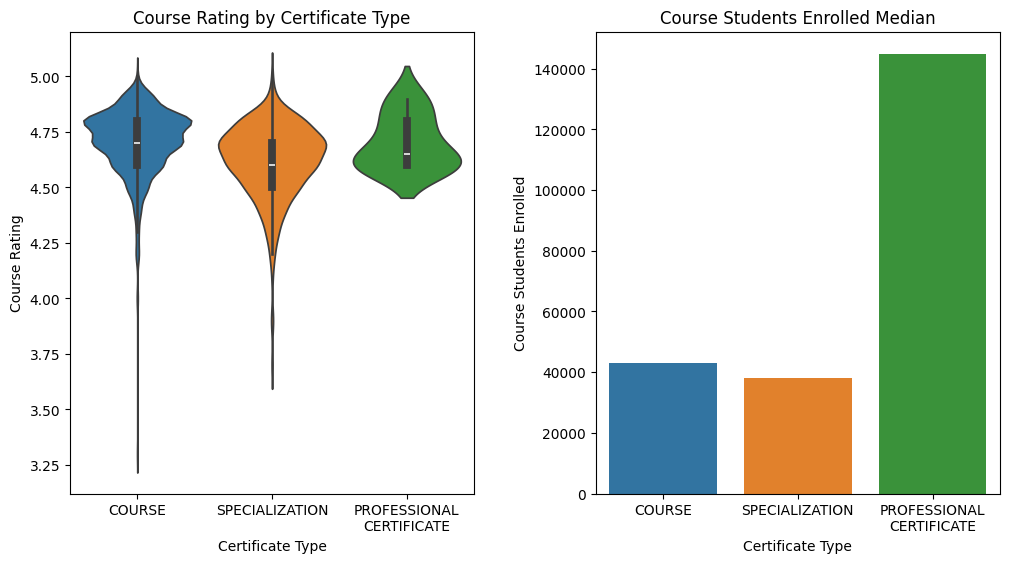

In [52]:
certificate_type_median = (
    df.groupby("course_Certificate_type")["course_students_enrolled"]
    .median()
    .reset_index()
)

certificate_colors = {
    "COURSE": "#1f77b4",
    "SPECIALIZATION": "#ff7f0e",
    "PROFESSIONAL CERTIFICATE": "#2ca02c",
}

certificate_order = ["COURSE", "SPECIALIZATION", "PROFESSIONAL CERTIFICATE"]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(
    data=df, x="course_Certificate_type", y="course_rating", palette=certificate_colors
)
plt.title("Course Rating by Certificate Type")
plt.xlabel("Certificate Type")
plt.ylabel("Course Rating")
plt.xticks(
    ticks=[0, 1, 2], labels=["COURSE", "SPECIALIZATION", "PROFESSIONAL\nCERTIFICATE"]
)

plt.subplot(1, 2, 2)
sns.barplot(
    data=certificate_type_median,
    x="course_Certificate_type",
    y="course_students_enrolled",
    palette=certificate_colors,
    order=certificate_order,
)
plt.title("Course Students Enrolled Median")
plt.ylabel("Course Students Enrolled")
plt.xlabel("Certificate Type")
plt.xticks(
    ticks=[0, 1, 2], labels=["COURSE", "SPECIALIZATION", "PROFESSIONAL\nCERTIFICATE"]
)

plt.subplots_adjust(wspace=0.3)

This violin plot illustrates course ratings by certificate type. The violin plot, similar to a box plot, provides additional information through kernel density estimation. From this chart, we observe that professional certificates exhibit no outliers, with course ratings consistently ranging between 4.5 and 5. The majority of these ratings cluster around 4.6, suggesting that professional certificate courses typically receive high ratings, often close to five stars.

In contrast, courses have a wider range of ratings, including some lower outliers. This indicates that courses occasionally receive lower ratings compared to professional certificates and specialization certificates. However, the kernel density estimation reveals that the average rating for courses tends to be higher than that for professional and specialization certificates, indicating that most course ratings are relatively high. The bar plot reveals astounding demand for professional certificates.

**Pie chart** Distribution of Course Certificate by Types

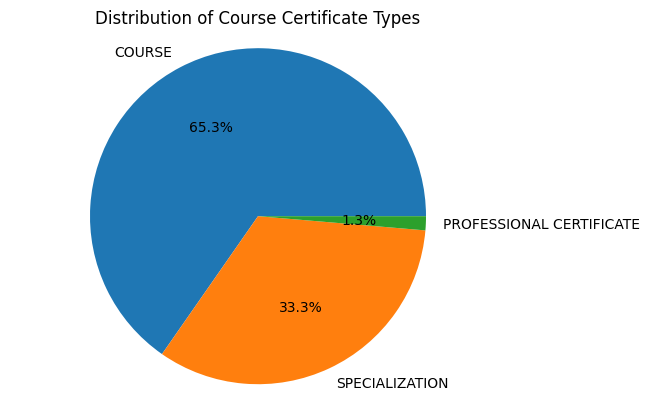

In [53]:
df["course_Certificate_type"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Course Certificate Types")
plt.axis("equal")
plt.ylabel("");

This pie chart shows the percentage of a certificate type so we can see that most of the type of courses which are two two thirds or 65.3% of all courses one for the specializations and only 1.3% are professional certificates rewrite this in professional Style

**Stacked Bar Plot** for Course Certificate Types by Organization (Top-10)

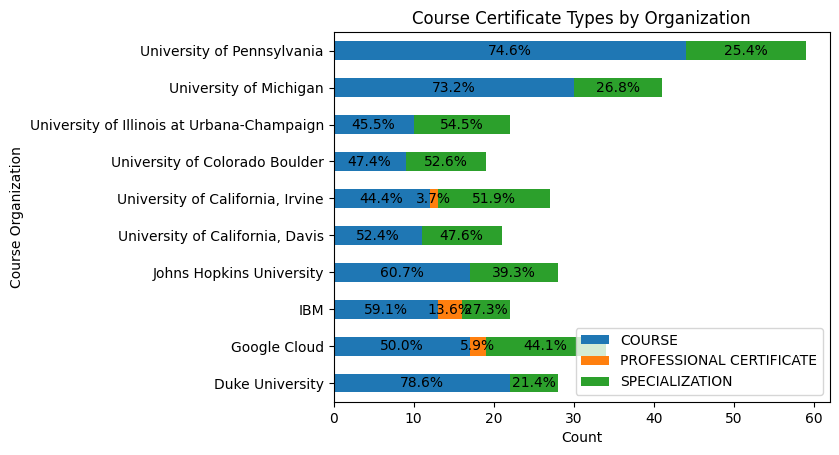

In [54]:
df_top_10 = df[
    df["course_organization"].isin(
        df["course_organization"].value_counts().nlargest(10).index
    )
]

pivot_table = pd.pivot_table(
    df_top_10,
    index="course_organization",
    columns="course_Certificate_type",
    values="course_title",
    aggfunc="count",
)


pivot_table.plot(kind="barh", stacked=True)

for i, row in enumerate(pivot_table.iterrows()):
    org, counts = row
    for j, count in enumerate(counts):
        percentage = (count / counts.sum()) * 100
        if not np.isnan(counts.cumsum().iloc[j] - (count / 2)):
            plt.text(
                counts.cumsum().iloc[j] - (count / 2),
                i,
                f"{percentage:.1f}%",
                ha="center",
                va="center",
            )
        else:
            continue


plt.legend(loc="lower right")
plt.title("Course Certificate Types by Organization")
plt.xlabel("Count")
plt.ylabel("Course Organization")
plt.show();

This horizontal stacked bar chart illustrates the distribution of course certificate types by organization. Notably, only free institutions such as Google Cloud, IBM, and the University of California offer professional certificates. While the majority of organizations focus primarily on providing courses, there are exceptions. For instance, the University of Illinois at Urbana-Champaign emphasize specialization over general courses.